In [1]:
import numpy as np
import pandas as pd

In [2]:
PATH = "G:/LoanStats3a.csv"
df = pd.read_csv(PATH, skiprows= [0])

c:\users\win 8.1\appdata\local\programs\python\python35\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(42538, 145)

Let's see the number of items in each column.

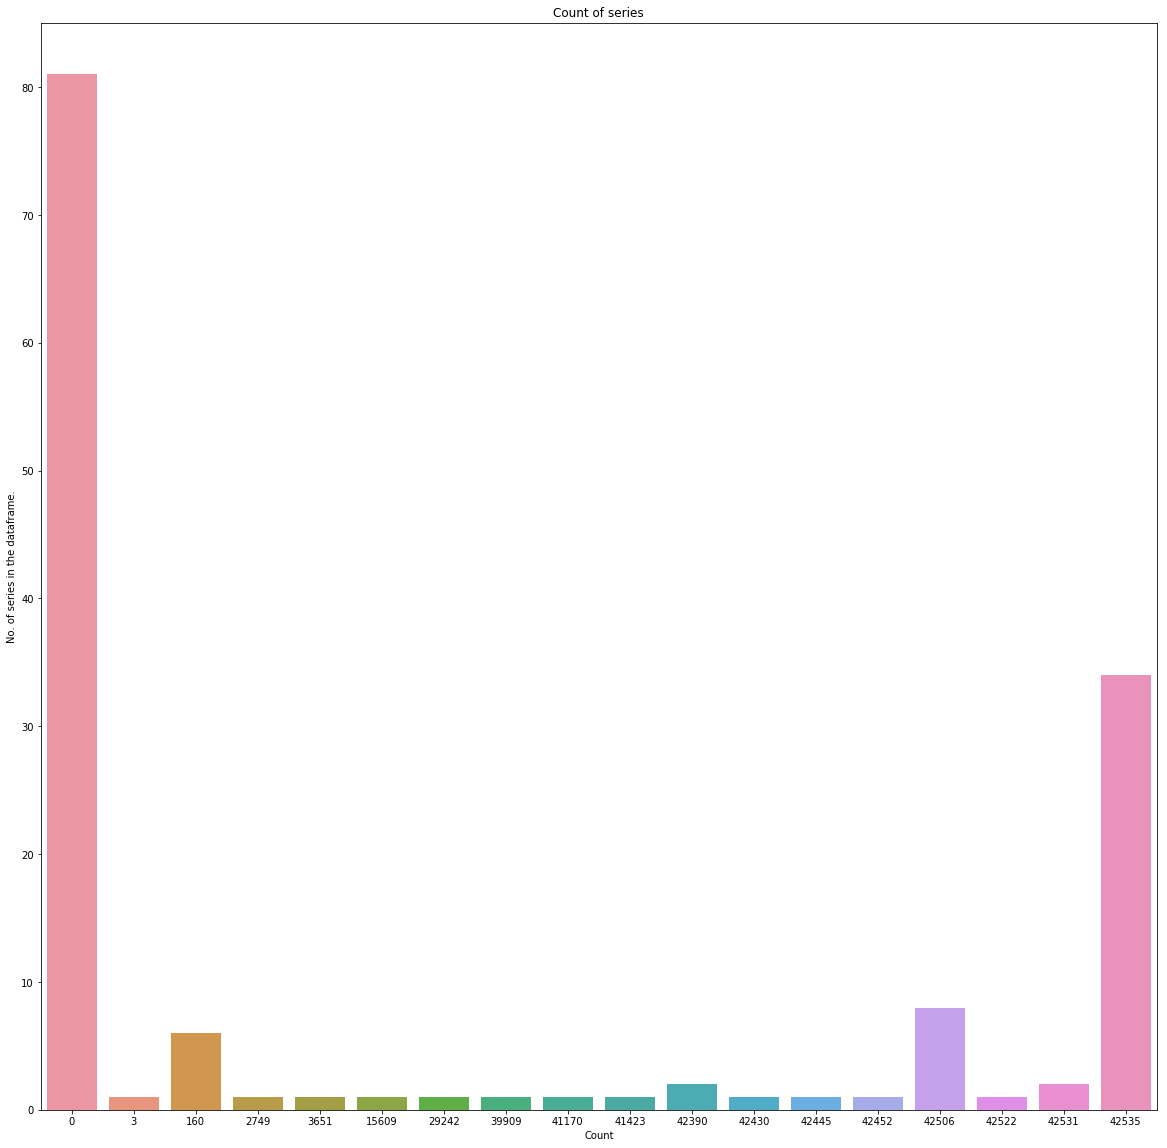

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
l = [df[col].count() for col in df.columns]
#for col in df.columns:
#    l.append(df[col].count())
fig, ax = plt.subplots(figsize = (20, 20))
sns.countplot(l, ax = ax)
plt.xlabel('Count')
plt.ylabel('No. of series in the dataframe.')
plt.title('Count of series')
plt.show()

Let's see the distribution of count by series.

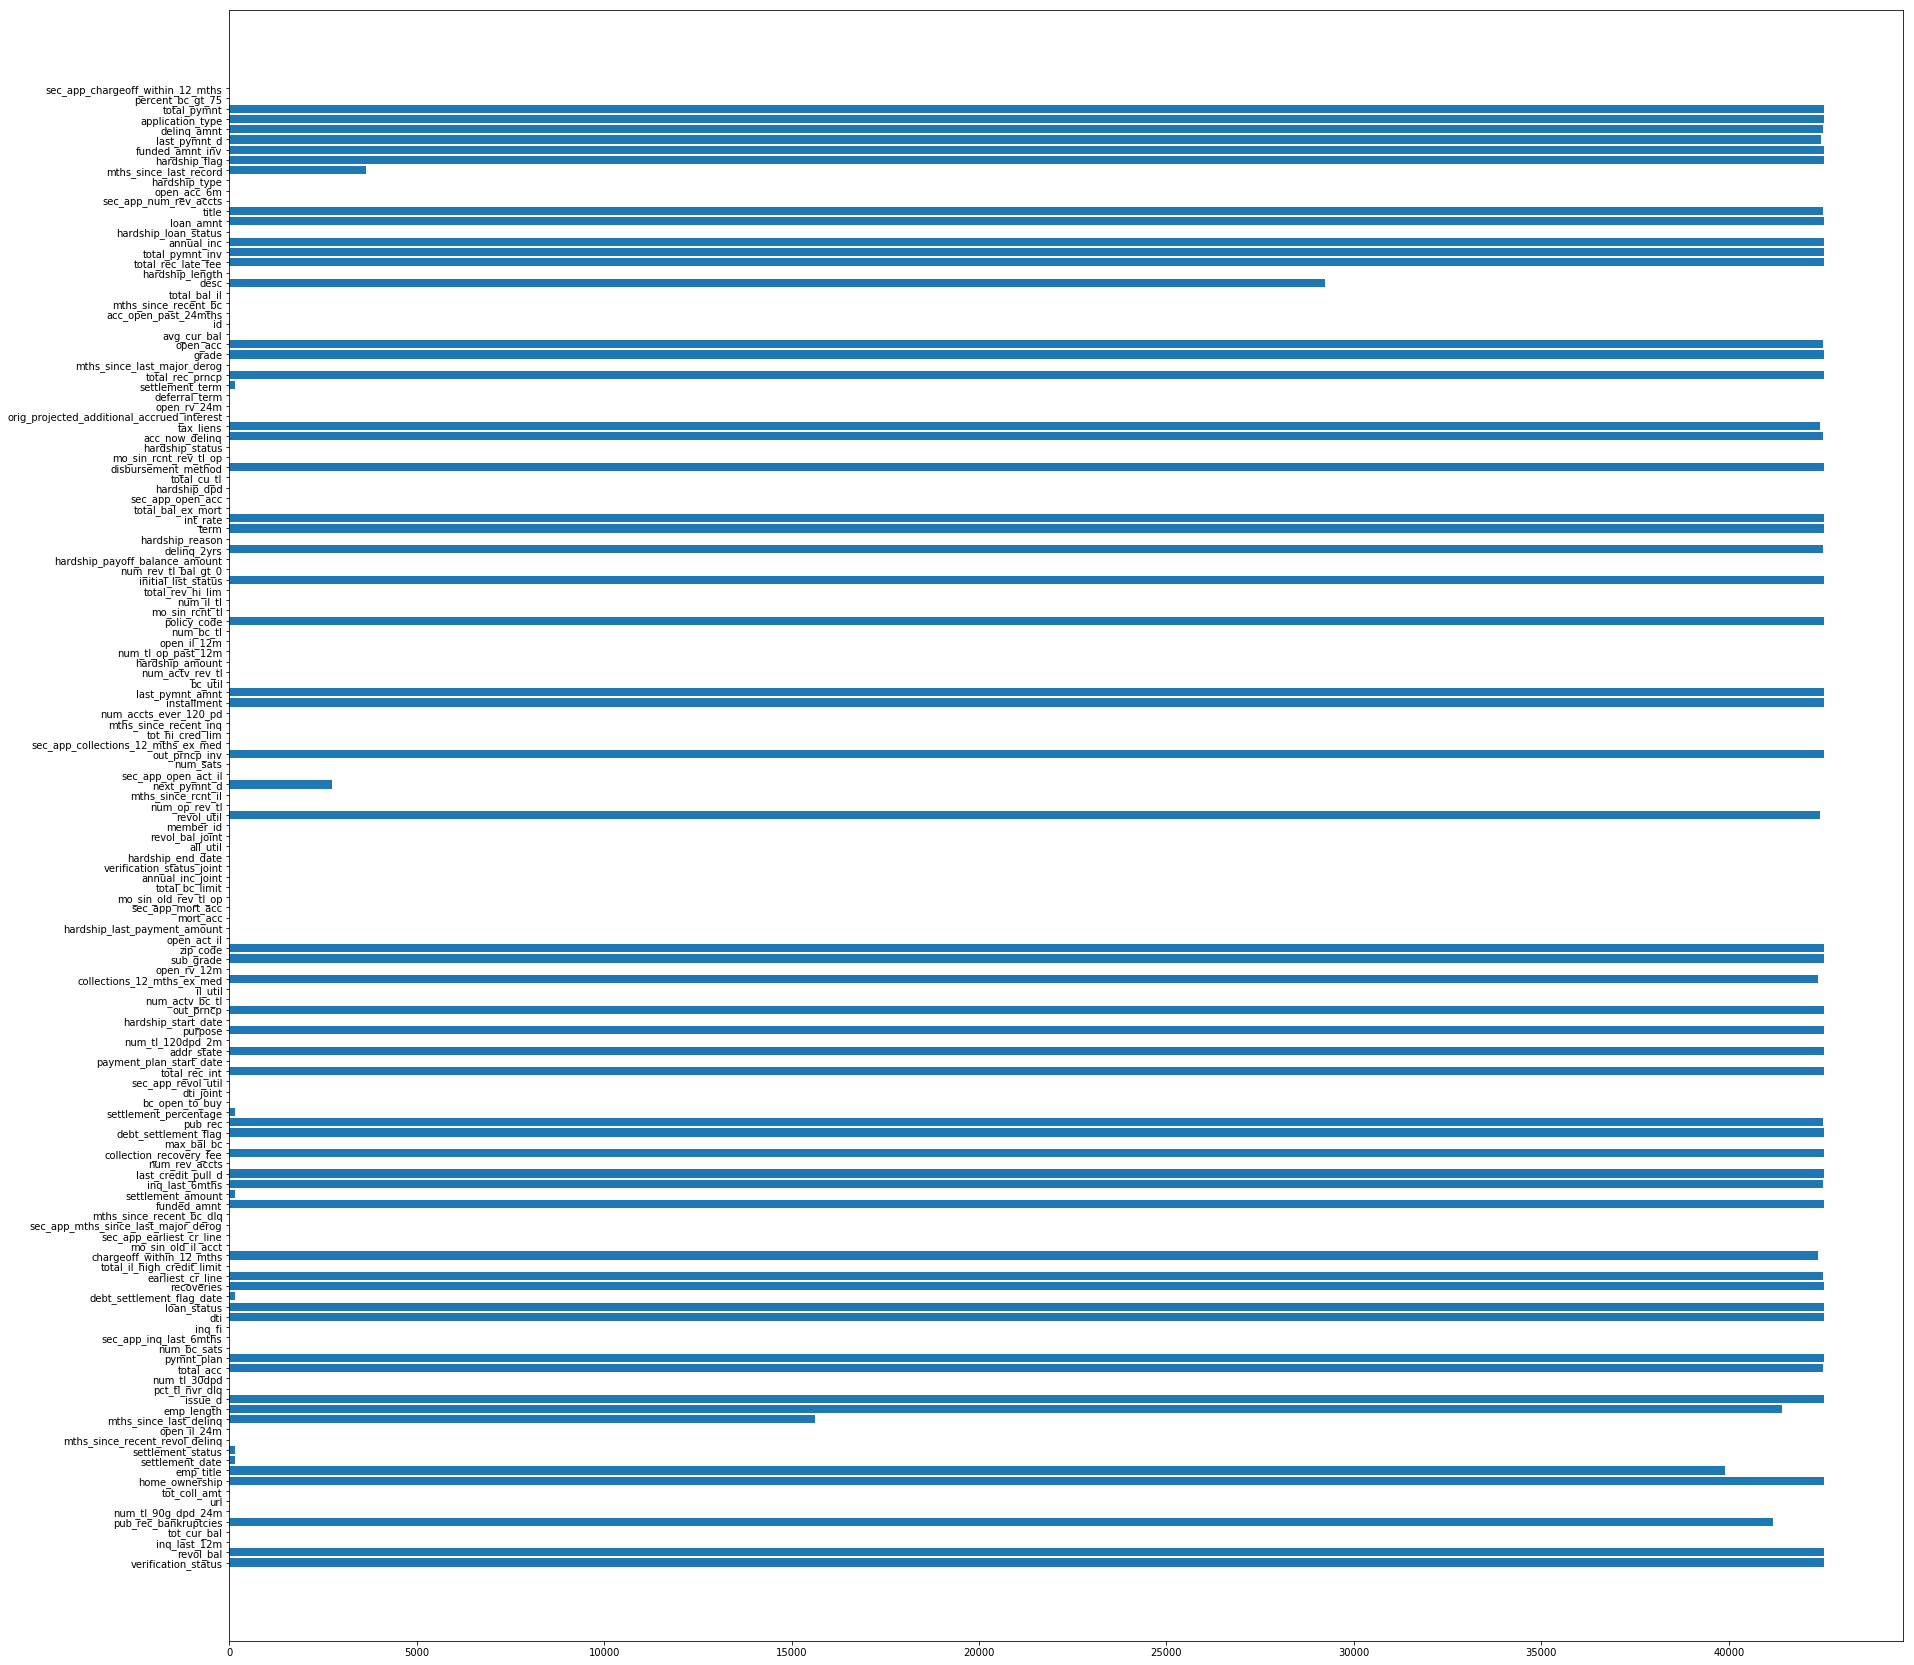

In [7]:
keys = df.columns
values = l
count_dict = {keys[i]: l[i] for i in range(len(l))}
ax, fig = plt.subplots(figsize = (30, 30))
plt.barh(range(len(count_dict)), list(count_dict.values()), align='center')
plt.yticks(range(len(count_dict)), list(count_dict.keys()))
plt.show()

There are a lot of columns having zero items, let's remove them ( > 80).

In [8]:
loan_data = pd.DataFrame()
loan_data = df
for col in loan_data.columns:
    if(loan_data[col].count() == 0):
        del(loan_data[col])

In [9]:
loan_data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


Let's see the set of elements of the column.

Let's inspect 'id' column as it contains only 3 elements

In [10]:
loan_data['id'].value_counts()

Total amount funded in policy code 2: 0            1
Loans that do not meet the credit policy           1
Total amount funded in policy code 1: 460296150    1
Name: id, dtype: int64

This information is either in some other series in the dataframe, or redundant, hence let's delete the column.

In [11]:
del(loan_data['id'])

In [12]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


Let's impute the continous missing values using MICE technique.

In [13]:
#Continous Data imputation
loan_data_describe_cols = list((loan_data.describe()).columns)
continous_loan_data_df = pd.DataFrame(data = loan_data[loan_data_describe_cols], columns = loan_data_describe_cols)
from impyute.imputation.cs import mice
#start the MICE training
imputed_training_loan_data = mice(continous_loan_data_df)
imputed_training_loan_data.head()

c:\users\win 8.1\appdata\local\programs\python\python35\lib\site-packages\impyute\util\preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()


,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,5000.0,5000.0,4975.0,162.87,24000.0,27.65,0.0,1.0,35.017618,59.175568,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4271.925,49.902375,1.2625
1,2500.0,2500.0,2500.0,59.83,30000.0,1.00,0.0,5.0,35.017618,59.175568,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4271.925,49.902375,1.2625
2,2400.0,2400.0,2400.0,84.33,12252.0,8.72,0.0,2.0,35.017618,59.175568,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4271.925,49.902375,1.2625
3,10000.0,10000.0,10000.0,339.31,49200.0,20.00,0.0,1.0,35.000000,59.175568,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4271.925,49.902375,1.2625
4,3000.0,3000.0,3000.0,67.79,80000.0,17.94,0.0,0.0,38.000000,59.175568,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4271.925,49.902375,1.2625


Now, let's  see the description of the various continous variables.

In [14]:
imputed_training_loan_data.columns = loan_data_describe_cols
imputed_training_loan_data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,settlement_amount,settlement_percentage,settlement_term
count,42538.000000,42538.000000,42538.000000,42538.000000,4.253800e+04,42538.000000,42538.000000,42538.000000,42538.000000,42538.000000,...,42538.0,42538.0,42538.000000,42538.0,42538.000000,42538.000000,42538.000000,42538.000000,42538.000000,42538.000000
mean,11089.722581,10821.585753,10139.938785,322.623063,6.913656e+04,13.373043,0.152449,1.081424,35.017618,59.175568,...,0.0,1.0,0.000094,0.0,0.143039,0.045227,0.000024,4271.925000,49.902375,1.262500
std,7410.677051,7146.662646,7131.346525,208.919849,6.409108e+04,6.726078,0.512214,1.526880,13.579861,13.810274,...,0.0,0.0,0.009697,0.0,29.348534,0.205353,0.004849,190.721872,0.951682,0.253289
min,500.000000,500.000000,0.000000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000,193.290000,10.690000,0.000000
25%,5200.000000,5000.000000,4950.000000,165.550000,4.000000e+04,8.200000,0.000000,0.000000,35.017618,59.175568,...,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000,4271.925000,49.902375,1.262500
50%,9700.000000,9600.000000,8500.000000,277.705000,5.900000e+04,13.470000,0.000000,1.000000,35.017618,59.175568,...,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000,4271.925000,49.902375,1.262500
75%,15000.000000,15000.000000,14000.000000,428.105000,8.248500e+04,18.680000,0.000000,2.000000,35.017618,59.175568,...,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000,4271.925000,49.902375,1.262500
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,13.000000,33.000000,120.000000,129.000000,...,0.0,1.0,1.000000,0.0,6053.000000,2.000000,1.000000,14798.200000,92.740000,24.000000


Let's impute the categorical variables now.

In [15]:
loan_data_cat_describe_cols = list((loan_data.describe(include = 'object')).columns)
cat_loan_data_df = pd.DataFrame(data = loan_data[loan_data_cat_describe_cols], columns = loan_data_cat_describe_cols)
cat_loan_data_df.head()

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,...,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date
0,36 months,10.65%,B,B2,NaN,10+ years,RENT,Verified,Dec-2011,Fully Paid,...,Jan-2015,NaN,Dec-2018,Individual,N,Cash,N,NaN,NaN,NaN
1,60 months,15.27%,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-2011,Charged Off,...,Apr-2013,NaN,Oct-2016,Individual,N,Cash,N,NaN,NaN,NaN
2,36 months,15.96%,C,C5,NaN,10+ years,RENT,Not Verified,Dec-2011,Fully Paid,...,Jun-2014,NaN,Jun-2017,Individual,N,Cash,N,NaN,NaN,NaN
3,36 months,13.49%,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-2011,Fully Paid,...,Jan-2015,NaN,Apr-2016,Individual,N,Cash,N,NaN,NaN,NaN
4,60 months,12.69%,B,B5,University Medical Group,1 year,RENT,Source Verified,Dec-2011,Fully Paid,...,Jan-2017,NaN,Apr-2018,Individual,N,Cash,N,NaN,NaN,NaN


In [18]:
#Imputing missing categorical variables.
value_dict = {col: cat_loan_data_df[col].value_counts().index[0] for col in cat_loan_data_df.columns}
cat_loan_data_df_filled = cat_loan_data_df.fillna(value = value_dict)

In [19]:
cat_loan_data_df_filled.describe(include = 'object')

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,...,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date
count,42538,42538,42538,42538,42538,42538,42538,42538,42538,42538,...,42538,42538,42538,42538,42538,42538,42538,42538,42538,42538
unique,2,394,7,35,30658,11,5,3,55,4,...,112,98,138,1,1,1,2,63,3,61
top,36 months,10.99%,B,B3,US Army,10+ years,RENT,Not Verified,Dec-2011,Fully Paid,...,Mar-2013,Mar-2011,Jan-2019,Individual,N,Cash,N,Jun-2017,COMPLETE,Oct-2013
freq,31537,973,12392,3000,2768,10484,20184,18761,2270,34119,...,1156,39896,8807,42538,42538,42538,42378,42396,42521,42386


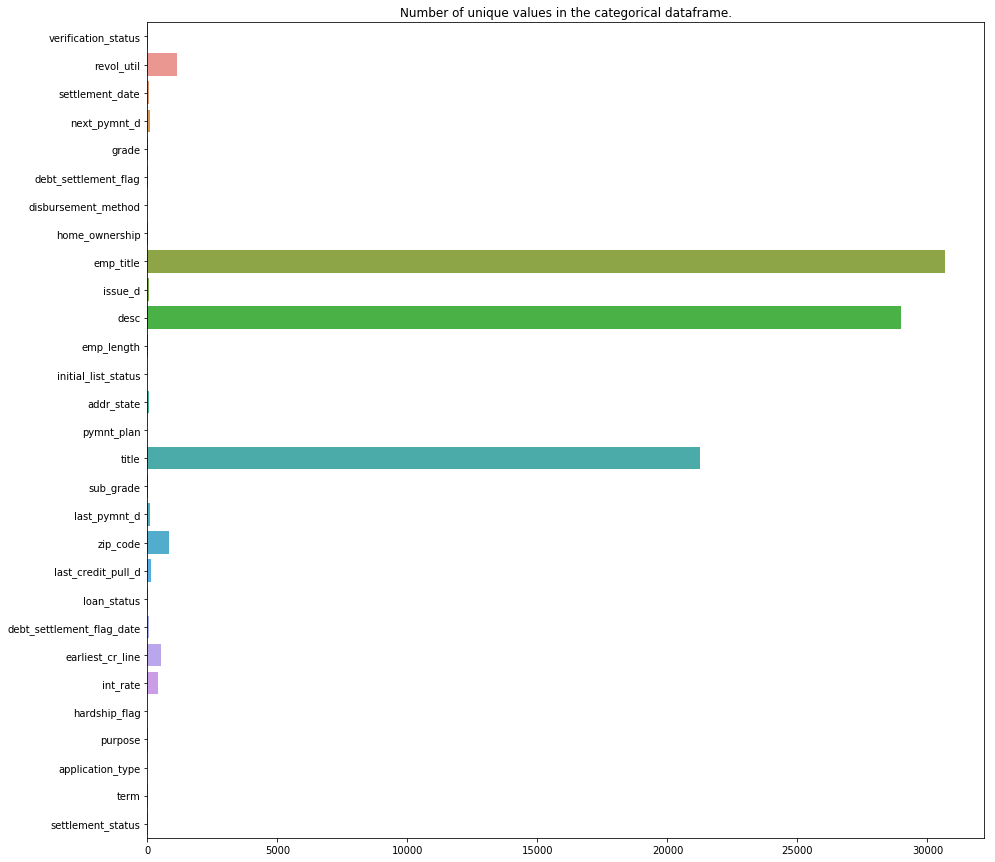

In [20]:
fig, ax = plt.subplots(figsize = (15, 15))
co_dict = {col: len(cat_loan_data_df_filled[col].value_counts()) for col in cat_loan_data_df_filled.columns}
sns.barplot(y = list(co_dict.keys()), x = list(co_dict.values()), orient = 'h', ax = ax)
plt.title('Number of unique values in the categorical dataframe.')
plt.show()

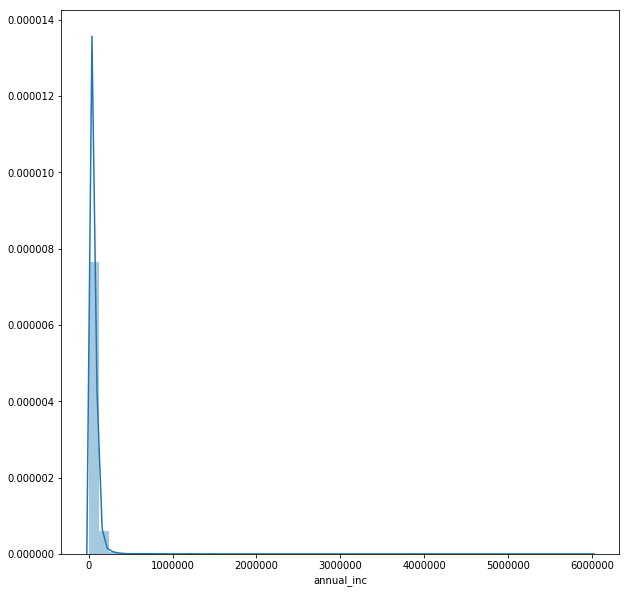

In [21]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.distplot(imputed_training_loan_data['annual_inc'], ax = ax)
plt.show()

The 'emp_title' might be closely related to 'annual_inc' thus I  will try to segregate the emp_title into 3 classes, thus drastically reducing the number of value counts.


In [22]:
annualInc_binned = pd.cut(imputed_training_loan_data['annual_inc'], 
                                                     bins = 3,
                                                     labels = ['Low_income',
                                                               'Medium_income',
                                                               'High_income'])
#new_emp_title_list = ['A' if annualInc_binned[i] = 'Low_income' else 'B' if annualInc_binned[i] = 'Medium_income' else 'C' if annualInc_binned[i] = 'High_income' for i in range(len(annualInc_binned))]

#else cat_loan_data_df_filled['emp_title'][i] = 'B' if annualInc_binned[i] = 'Medium_income' else cat_loan_data_df_filled['emp_title'][i] = 'C' if annualInc_binned[i] = 'High_income' for i in range(42538)]
new_emp_title_list = []
#Write a for loop if this is not working.
for i in range(len(annualInc_binned)):
    if(annualInc_binned[i] == 'Low_income'):
        cat_loan_data_df_filled['emp_title'][i] = 'A'
    if(annualInc_binned[i] == 'Medium_income'):
        cat_loan_data_df_filled['emp_title'][i] = 'B'
    if(annualInc_binned[i] == 'High_income'):
        cat_loan_data_df_filled['emp_title'][i] = 'C'
cat_loan_data_df_filled['emp_title'].head()
cat_loan_data_df_filled['emp_title'].value_counts()

A    42535
B        2
C        1
Name: emp_title, dtype: int64

This value_count will not help us to gain any additional information, thus I will remove the 'emp_title' for now.

In [23]:
cat_loan_data_df_filled = cat_loan_data_df_filled.drop('emp_title', axis = 1)

Now, let's examine 'debt_settlement_flag_date'.

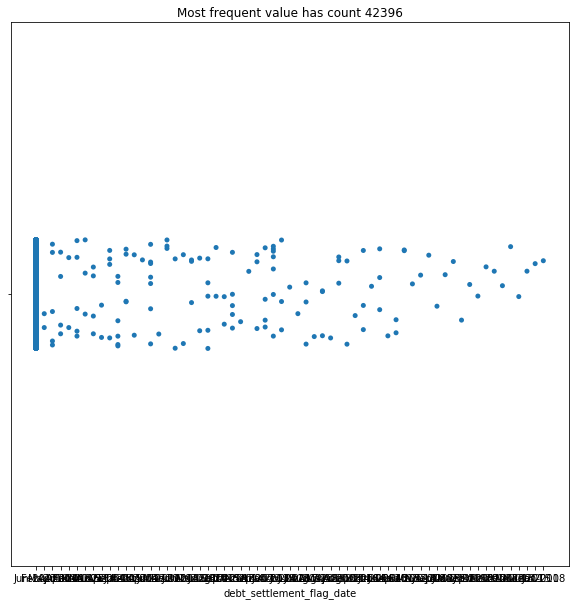

In [24]:
fig, ax = plt.subplots(figsize = (10, 10))
plt.title('Most frequent value has count {}'.format(cat_loan_data_df_filled['debt_settlement_flag_date'].value_counts()[0]))
sns.stripplot(cat_loan_data_df_filled['debt_settlement_flag_date'], ax = ax)
plt.show()

Thus, the 'debt_settlement_flag_date' attribute has same value for a lot of examples in the dataset. Hence is does not give any additional information. So let's drop it.

In [25]:
cat_loan_data_df_filled = cat_loan_data_df_filled.drop('debt_settlement_flag_date', axis = 1)

Examining 'desc'.

In [26]:
cat_loan_data_df_filled['desc'].head()

0      Borrower added on 12/22/11 > I need to upgra...
1      Borrower added on 12/22/11 > I plan to use t...
2                                                     
3      Borrower added on 12/21/11 > to pay for prop...
4      Borrower added on 12/21/11 > I plan on combi...
Name: desc, dtype: object

Thus, the 'desc' column contains text data. Let's remove it for now, as the modelling currently will not be based on textual data.

In [27]:
cat_loan_data_df_filled = cat_loan_data_df_filled.drop('desc', axis = 1)

Let's examine 'earliest_cr_line' variable.

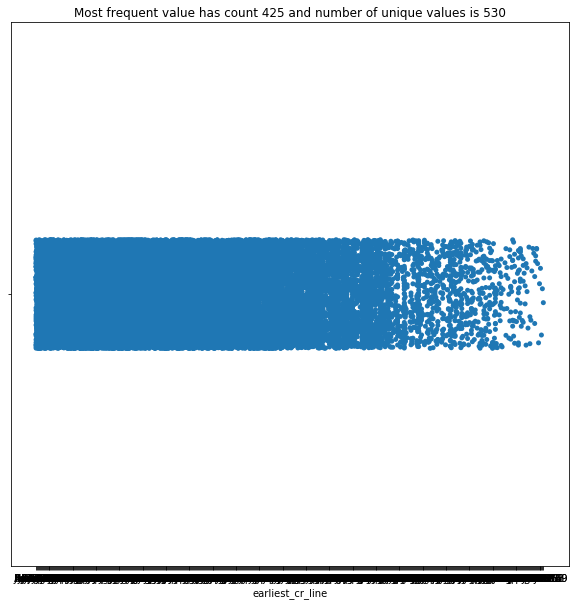

In [28]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.stripplot(cat_loan_data_df_filled['earliest_cr_line'], ax = ax)
plt.title('Most frequent value has count {0} and number of unique values is {1}'.format(cat_loan_data_df_filled['earliest_cr_line'].value_counts()[0], len(cat_loan_data_df_filled['earliest_cr_line'].value_counts())))
plt.show()


This variable can be useful.

Let's separate the data by year.

In [29]:
year_list = [cat_loan_data_df_filled['earliest_cr_line'][i].split('-')[1] for i in range(len(cat_loan_data_df_filled['earliest_cr_line']))]
year_set = set(year_list) #Length of the set is 53.
cat_loan_data_df_filled = cat_loan_data_df_filled.drop('earliest_cr_line', axis = 1)
earliest_cr_line_year = pd.DataFrame(year_list, columns = ['earliest_cr_line_year'])
cat_loan_data_df_filled = pd.concat([cat_loan_data_df_filled, earliest_cr_line_year], axis = 1)
cat_loan_data_df_filled.head()

,term,int_rate,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,...,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,hardship_flag,disbursement_method,debt_settlement_flag,settlement_status,settlement_date,earliest_cr_line_year
0,36 months,10.65%,B,B2,10+ years,RENT,Verified,Dec-2011,Fully Paid,n,...,Jan-2015,Mar-2011,Dec-2018,Individual,N,Cash,N,COMPLETE,Oct-2013,1985
1,60 months,15.27%,C,C4,< 1 year,RENT,Source Verified,Dec-2011,Charged Off,n,...,Apr-2013,Mar-2011,Oct-2016,Individual,N,Cash,N,COMPLETE,Oct-2013,1999
2,36 months,15.96%,C,C5,10+ years,RENT,Not Verified,Dec-2011,Fully Paid,n,...,Jun-2014,Mar-2011,Jun-2017,Individual,N,Cash,N,COMPLETE,Oct-2013,2001
3,36 months,13.49%,C,C1,10+ years,RENT,Source Verified,Dec-2011,Fully Paid,n,...,Jan-2015,Mar-2011,Apr-2016,Individual,N,Cash,N,COMPLETE,Oct-2013,1996
4,60 months,12.69%,B,B5,1 year,RENT,Source Verified,Dec-2011,Fully Paid,n,...,Jan-2017,Mar-2011,Apr-2018,Individual,N,Cash,N,COMPLETE,Oct-2013,1996


Let's see variance of the series now.

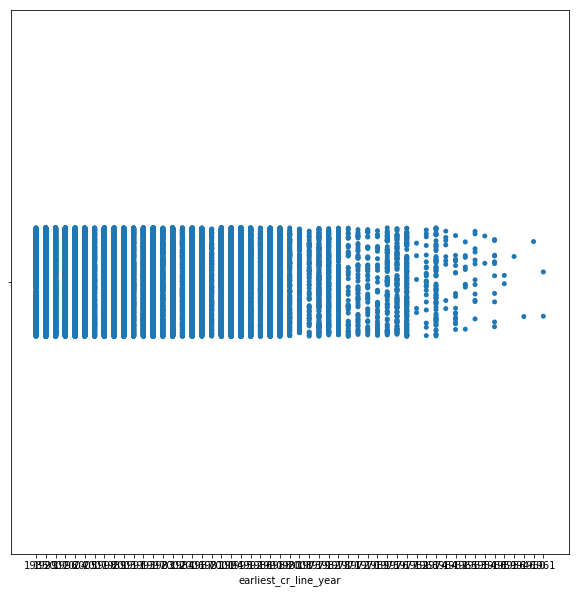

In [30]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.stripplot(cat_loan_data_df_filled['earliest_cr_line_year'], ax = ax)
plt.show()

Thus, dimensionality of the one hot encoded series will be reduced. Now, after examining 'int_rate', it can be converted to continous variable. 

In [31]:
cont_int_rate = [(float(cat_loan_data_df_filled['int_rate'][i].split('%')[0]) / 100) for i in range(len(cat_loan_data_df_filled['int_rate']))]
cat_loan_data_df_filled = cat_loan_data_df_filled.drop('int_rate', axis = 1)
int_rate = pd.DataFrame(cont_int_rate, columns = ['int_rate'])
imputed_training_loan_data = pd.concat([imputed_training_loan_data, int_rate], axis = 1)

Let's examine 'issue_d'.

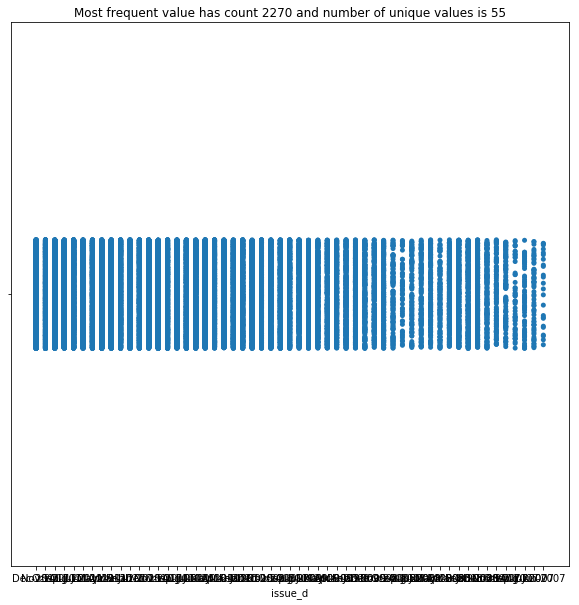

In [32]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.stripplot(cat_loan_data_df_filled['issue_d'], ax = ax)
plt.title('Most frequent value has count {0} and number of unique values is {1}'.format(cat_loan_data_df_filled['issue_d'].value_counts()[0], len(cat_loan_data_df_filled['issue_d'].value_counts())))
plt.show()

In [33]:
year_list = [cat_loan_data_df_filled['issue_d'][i].split('-')[1] for i in range(len(cat_loan_data_df_filled['issue_d']))]
year_set = set(year_list) #Length is 5
cat_loan_data_df_filled = cat_loan_data_df_filled.drop('issue_d', axis = 1)
issue_d_year = pd.DataFrame(year_list, columns = ['issue_d_year'])
cat_loan_data_df_filled = pd.concat([cat_loan_data_df_filled, issue_d_year], axis = 1)
cat_loan_data_df_filled.head()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,purpose,title,...,next_pymnt_d,last_credit_pull_d,application_type,hardship_flag,disbursement_method,debt_settlement_flag,settlement_status,settlement_date,earliest_cr_line_year,issue_d_year
0,36 months,B,B2,10+ years,RENT,Verified,Fully Paid,n,credit_card,Computer,...,Mar-2011,Dec-2018,Individual,N,Cash,N,COMPLETE,Oct-2013,1985,2011
1,60 months,C,C4,< 1 year,RENT,Source Verified,Charged Off,n,car,bike,...,Mar-2011,Oct-2016,Individual,N,Cash,N,COMPLETE,Oct-2013,1999,2011
2,36 months,C,C5,10+ years,RENT,Not Verified,Fully Paid,n,small_business,real estate business,...,Mar-2011,Jun-2017,Individual,N,Cash,N,COMPLETE,Oct-2013,2001,2011
3,36 months,C,C1,10+ years,RENT,Source Verified,Fully Paid,n,other,personel,...,Mar-2011,Apr-2016,Individual,N,Cash,N,COMPLETE,Oct-2013,1996,2011
4,60 months,B,B5,1 year,RENT,Source Verified,Fully Paid,n,other,Personal,...,Mar-2011,Apr-2018,Individual,N,Cash,N,COMPLETE,Oct-2013,1996,2011


Let's examine 'last_credit_pull_d'.

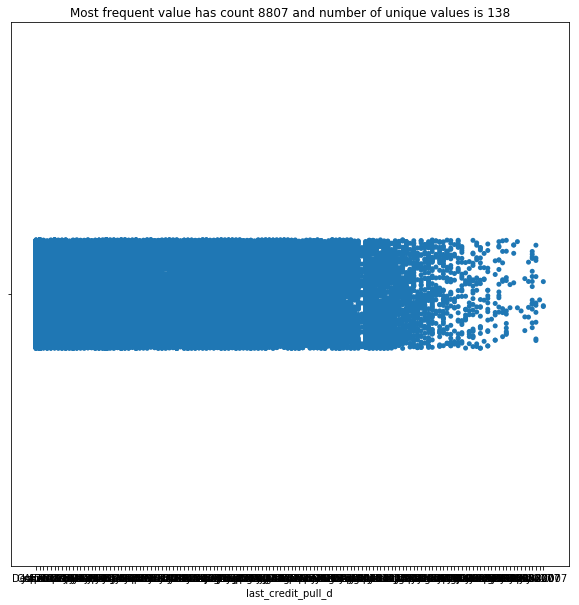

In [34]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.stripplot(cat_loan_data_df_filled['last_credit_pull_d'], ax = ax)
plt.title('Most frequent value has count {0} and number of unique values is {1}'.format(cat_loan_data_df_filled['last_credit_pull_d'].value_counts()[0], len(cat_loan_data_df_filled['last_credit_pull_d'].value_counts())))
plt.show()

In [35]:
year_list = [cat_loan_data_df_filled['last_credit_pull_d'][i].split('-')[1] for i in range(len(cat_loan_data_df_filled['last_credit_pull_d']))]
year_set = set(year_list) #Length is 5
cat_loan_data_df_filled = cat_loan_data_df_filled.drop('last_credit_pull_d', axis = 1)
last_credit_pull_d_year = pd.DataFrame(year_list, columns = ['last_credit_pull_d'])
cat_loan_data_df_filled = pd.concat([cat_loan_data_df_filled, last_credit_pull_d_year], axis = 1)
cat_loan_data_df_filled.head()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,purpose,title,...,next_pymnt_d,application_type,hardship_flag,disbursement_method,debt_settlement_flag,settlement_status,settlement_date,earliest_cr_line_year,issue_d_year,last_credit_pull_d
0,36 months,B,B2,10+ years,RENT,Verified,Fully Paid,n,credit_card,Computer,...,Mar-2011,Individual,N,Cash,N,COMPLETE,Oct-2013,1985,2011,2018
1,60 months,C,C4,< 1 year,RENT,Source Verified,Charged Off,n,car,bike,...,Mar-2011,Individual,N,Cash,N,COMPLETE,Oct-2013,1999,2011,2016
2,36 months,C,C5,10+ years,RENT,Not Verified,Fully Paid,n,small_business,real estate business,...,Mar-2011,Individual,N,Cash,N,COMPLETE,Oct-2013,2001,2011,2017
3,36 months,C,C1,10+ years,RENT,Source Verified,Fully Paid,n,other,personel,...,Mar-2011,Individual,N,Cash,N,COMPLETE,Oct-2013,1996,2011,2016
4,60 months,B,B5,1 year,RENT,Source Verified,Fully Paid,n,other,Personal,...,Mar-2011,Individual,N,Cash,N,COMPLETE,Oct-2013,1996,2011,2018


Let's examine 'last_pymnt_d'.

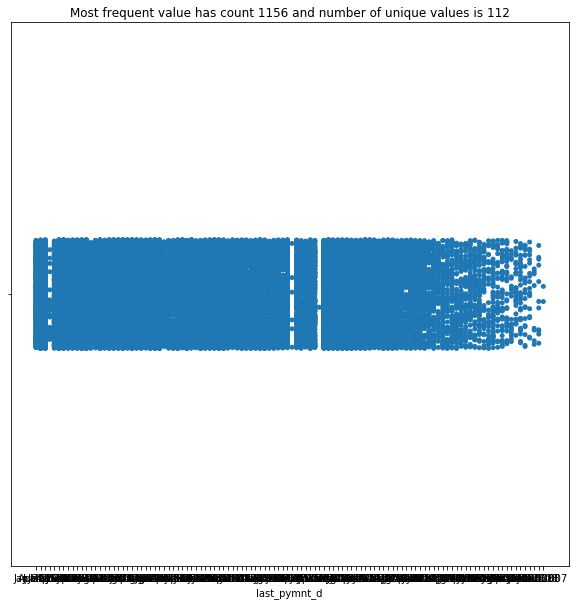

In [36]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.stripplot(cat_loan_data_df_filled['last_pymnt_d'], ax = ax)
plt.title('Most frequent value has count {0} and number of unique values is {1}'.format(cat_loan_data_df_filled['last_pymnt_d'].value_counts()[0], len(cat_loan_data_df_filled['last_pymnt_d'].value_counts())))
plt.show()

In [37]:
year_list = [cat_loan_data_df_filled['last_pymnt_d'][i].split('-')[1] for i in range(len(cat_loan_data_df_filled['last_pymnt_d']))]
year_set = set(year_list) #Length of set is 11.
cat_loan_data_df_filled = cat_loan_data_df_filled.drop('last_pymnt_d', axis = 1)
last_pymnt_d_year = pd.DataFrame(year_list, columns = ['last_pymnt_d'])
cat_loan_data_df_filled = pd.concat([cat_loan_data_df_filled, last_pymnt_d_year], axis = 1)
cat_loan_data_df_filled.head()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,purpose,title,...,application_type,hardship_flag,disbursement_method,debt_settlement_flag,settlement_status,settlement_date,earliest_cr_line_year,issue_d_year,last_credit_pull_d,last_pymnt_d
0,36 months,B,B2,10+ years,RENT,Verified,Fully Paid,n,credit_card,Computer,...,Individual,N,Cash,N,COMPLETE,Oct-2013,1985,2011,2018,2015
1,60 months,C,C4,< 1 year,RENT,Source Verified,Charged Off,n,car,bike,...,Individual,N,Cash,N,COMPLETE,Oct-2013,1999,2011,2016,2013
2,36 months,C,C5,10+ years,RENT,Not Verified,Fully Paid,n,small_business,real estate business,...,Individual,N,Cash,N,COMPLETE,Oct-2013,2001,2011,2017,2014
3,36 months,C,C1,10+ years,RENT,Source Verified,Fully Paid,n,other,personel,...,Individual,N,Cash,N,COMPLETE,Oct-2013,1996,2011,2016,2015
4,60 months,B,B5,1 year,RENT,Source Verified,Fully Paid,n,other,Personal,...,Individual,N,Cash,N,COMPLETE,Oct-2013,1996,2011,2018,2017


Let's examine 'next_pymnt_d'.

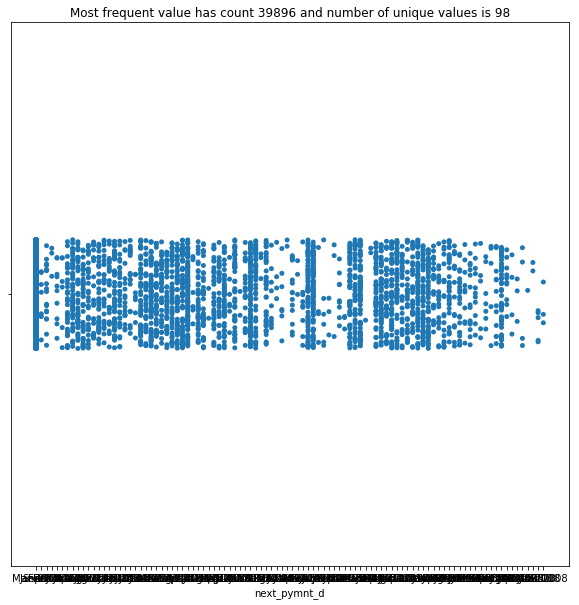

In [38]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.stripplot(cat_loan_data_df_filled['next_pymnt_d'], ax = ax)
plt.title('Most frequent value has count {0} and number of unique values is {1}'.format(cat_loan_data_df_filled['next_pymnt_d'].value_counts()[0], len(cat_loan_data_df_filled['next_pymnt_d'].value_counts())))
plt.show()

In [39]:
year_list = [cat_loan_data_df_filled['next_pymnt_d'][i].split('-')[1] for i in range(len(cat_loan_data_df_filled['next_pymnt_d']))]
year_set = set(year_list)
cat_loan_data_df_filled = cat_loan_data_df_filled.drop('next_pymnt_d', axis = 1)
next_pymnt_d_year = pd.DataFrame(year_list, columns = ['next_pymnt_d'])
cat_loan_data_df_filled = pd.concat([cat_loan_data_df_filled, next_pymnt_d_year], axis = 1)
cat_loan_data_df_filled.head()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,purpose,title,...,hardship_flag,disbursement_method,debt_settlement_flag,settlement_status,settlement_date,earliest_cr_line_year,issue_d_year,last_credit_pull_d,last_pymnt_d,next_pymnt_d
0,36 months,B,B2,10+ years,RENT,Verified,Fully Paid,n,credit_card,Computer,...,N,Cash,N,COMPLETE,Oct-2013,1985,2011,2018,2015,2011
1,60 months,C,C4,< 1 year,RENT,Source Verified,Charged Off,n,car,bike,...,N,Cash,N,COMPLETE,Oct-2013,1999,2011,2016,2013,2011
2,36 months,C,C5,10+ years,RENT,Not Verified,Fully Paid,n,small_business,real estate business,...,N,Cash,N,COMPLETE,Oct-2013,2001,2011,2017,2014,2011
3,36 months,C,C1,10+ years,RENT,Source Verified,Fully Paid,n,other,personel,...,N,Cash,N,COMPLETE,Oct-2013,1996,2011,2016,2015,2011
4,60 months,B,B5,1 year,RENT,Source Verified,Fully Paid,n,other,Personal,...,N,Cash,N,COMPLETE,Oct-2013,1996,2011,2018,2017,2011


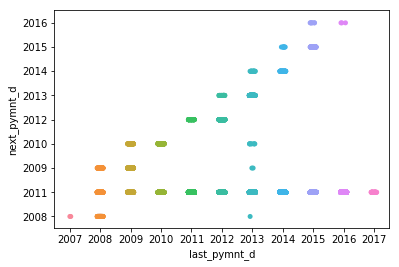

In [40]:
sns.stripplot(cat_loan_data_df_filled['last_pymnt_d'], cat_loan_data_df_filled['next_pymnt_d'])
plt.show()

There seems to be some sort of relationship between the last_pymnt_date and next_pymnt_date, so let's keep both the variables in the dataset.

Let's examine 'revol_util'.

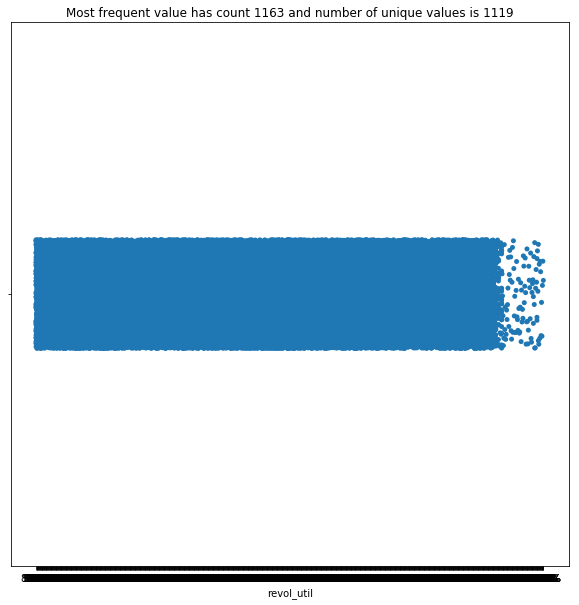

In [41]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.stripplot(cat_loan_data_df_filled['revol_util'], ax = ax)
plt.title('Most frequent value has count {0} and number of unique values is {1}'.format(cat_loan_data_df_filled['revol_util'].value_counts()[0], len(cat_loan_data_df_filled['revol_util'].value_counts())))
plt.show()

In [42]:
cat_loan_data_df_filled['revol_util'].head()

0    83.7%
1     9.4%
2    98.5%
3      21%
4    53.9%
Name: revol_util, dtype: object

This is numeric data, let's add this data as a continous data.

In [43]:
cont_revol_util = [(float(cat_loan_data_df_filled['revol_util'][i].split('%')[0]) / 100) for i in range(len(cat_loan_data_df_filled['revol_util']))]
cat_loan_data_df_filled = cat_loan_data_df_filled.drop('revol_util', axis = 1)
revol_util = pd.DataFrame(cont_revol_util, columns = ['cont_revol_util'])
imputed_training_loan_data = pd.concat([imputed_training_loan_data, revol_util], axis = 1)
imputed_training_loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,settlement_amount,settlement_percentage,settlement_term,int_rate,cont_revol_util
0,5000.0,5000.0,4975.0,162.87,24000.0,27.65,0.0,1.0,35.017618,59.175568,...,0.0,0.0,0.0,0.0,0.0,4271.925,49.902375,1.2625,0.1065,0.837
1,2500.0,2500.0,2500.0,59.83,30000.0,1.00,0.0,5.0,35.017618,59.175568,...,0.0,0.0,0.0,0.0,0.0,4271.925,49.902375,1.2625,0.1527,0.094
2,2400.0,2400.0,2400.0,84.33,12252.0,8.72,0.0,2.0,35.017618,59.175568,...,0.0,0.0,0.0,0.0,0.0,4271.925,49.902375,1.2625,0.1596,0.985
3,10000.0,10000.0,10000.0,339.31,49200.0,20.00,0.0,1.0,35.000000,59.175568,...,0.0,0.0,0.0,0.0,0.0,4271.925,49.902375,1.2625,0.1349,0.210
4,3000.0,3000.0,3000.0,67.79,80000.0,17.94,0.0,0.0,38.000000,59.175568,...,0.0,0.0,0.0,0.0,0.0,4271.925,49.902375,1.2625,0.1269,0.539


Let's examine 'settlement_date'.

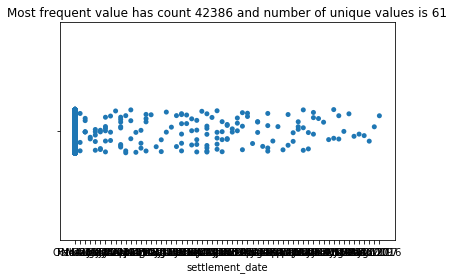

In [44]:
sns.stripplot(cat_loan_data_df_filled['settlement_date'])
plt.title('Most frequent value has count {0} and number of unique values is {1}'.format(cat_loan_data_df_filled['settlement_date'].value_counts()[0], len(cat_loan_data_df_filled['settlement_date'].value_counts())))
plt.show()

As most frequent value has a very high count, no new information is added through this column. So, let's drop this column.

In [45]:
cat_loan_data_df_filled = cat_loan_data_df_filled.drop('settlement_date', axis = 1)

Let's examine 'sub_grade'.

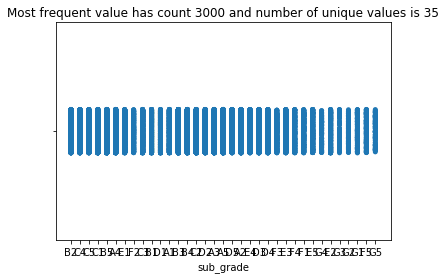

In [46]:
sns.stripplot(cat_loan_data_df_filled['sub_grade'])
plt.title('Most frequent value has count {0} and number of unique values is {1}'.format(cat_loan_data_df_filled['sub_grade'].value_counts()[0], len(cat_loan_data_df_filled['sub_grade'].value_counts())))
plt.show()

The values are equally distributed, let's keep the variable as it is.

Let's drop 'title' as it will have high dimensionality when one-hot encoded.

In [47]:
cat_loan_data_df_filled = cat_loan_data_df_filled.drop('title', axis = 1)

Let's examine 'zip_code'.

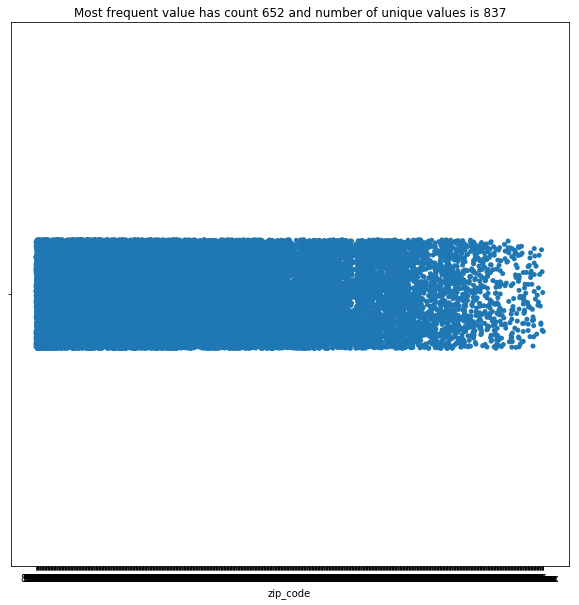

In [48]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.stripplot(cat_loan_data_df_filled['zip_code'], ax = ax)
plt.title('Most frequent value has count {0} and number of unique values is {1}'.format(cat_loan_data_df_filled['zip_code'].value_counts()[0], len(cat_loan_data_df_filled['zip_code'].value_counts())))
plt.show()

In [49]:
cat_loan_data_df_filled['zip_code'].head()

0    860xx
1    309xx
2    606xx
3    917xx
4    972xx
Name: zip_code, dtype: object

The zipcode variable can be converted to something more broader. Let's just consider the first digit as it [represents the state](https://en.wikipedia.org/wiki/ZIP_Code#Secondary_regional_prefixes_(123xx)_and_local_ZIP_Codes_(12345)).

In [50]:
state_code_list = [cat_loan_data_df_filled['zip_code'][i][0] for i in range(len(cat_loan_data_df_filled['zip_code']))]
cat_loan_data_df_filled = cat_loan_data_df_filled.drop('zip_code', axis = 1)
state_code = pd.DataFrame(state_code_list, columns = ['state_code'])
cat_loan_data_df_filled = pd.concat([cat_loan_data_df_filled, state_code], axis = 1)
cat_loan_data_df_filled.head()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,purpose,addr_state,...,hardship_flag,disbursement_method,debt_settlement_flag,settlement_status,earliest_cr_line_year,issue_d_year,last_credit_pull_d,last_pymnt_d,next_pymnt_d,state_code
0,36 months,B,B2,10+ years,RENT,Verified,Fully Paid,n,credit_card,AZ,...,N,Cash,N,COMPLETE,1985,2011,2018,2015,2011,8
1,60 months,C,C4,< 1 year,RENT,Source Verified,Charged Off,n,car,GA,...,N,Cash,N,COMPLETE,1999,2011,2016,2013,2011,3
2,36 months,C,C5,10+ years,RENT,Not Verified,Fully Paid,n,small_business,IL,...,N,Cash,N,COMPLETE,2001,2011,2017,2014,2011,6
3,36 months,C,C1,10+ years,RENT,Source Verified,Fully Paid,n,other,CA,...,N,Cash,N,COMPLETE,1996,2011,2016,2015,2011,9
4,60 months,B,B5,1 year,RENT,Source Verified,Fully Paid,n,other,OR,...,N,Cash,N,COMPLETE,1996,2011,2018,2017,2011,9


As the state_code already divides the data into various regions consisting of states, the 'addr_state' is redundant, also 'addr_state' high dimensionality when one-hot encoded. So let's drop 'addr_state'.

In [51]:
cat_loan_data_df_filled = cat_loan_data_df_filled.drop('addr_state', axis = 1)

Let's one-hot encode the categorical data,

In [52]:
cat_loan_data_df_filled_one_hot = pd.get_dummies(cat_loan_data_df_filled)
cat_loan_data_df_filled_one_hot.head()

,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,...,state_code_0,state_code_1,state_code_2,state_code_3,state_code_4,state_code_5,state_code_6,state_code_7,state_code_8,state_code_9
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Now, some of the variables might have only one value throughout, these variables are completely redundant, let's remove them if they are present.

In [53]:
redundant_cols = [col for col in cat_loan_data_df_filled_one_hot.columns if len(cat_loan_data_df_filled_one_hot[col].value_counts()) == 1]
redundant_cols

['pymnt_plan_n',
 'initial_list_status_f',
 'application_type_Individual',
 'hardship_flag_N',
 'disbursement_method_Cash']

In [55]:
one_hot_final = cat_loan_data_df_filled_one_hot.drop(redundant_cols, axis = 1)
one_hot_final.head()

,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,...,state_code_0,state_code_1,state_code_2,state_code_3,state_code_4,state_code_5,state_code_6,state_code_7,state_code_8,state_code_9
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Let's create final data,

In [57]:
final_data = pd.concat([imputed_training_loan_data, one_hot_final], axis = 1)
final_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,state_code_0,state_code_1,state_code_2,state_code_3,state_code_4,state_code_5,state_code_6,state_code_7,state_code_8,state_code_9
0,5000.0,5000.0,4975.0,162.87,24000.0,27.65,0.0,1.0,35.017618,59.175568,...,0,0,0,0,0,0,0,0,1,0
1,2500.0,2500.0,2500.0,59.83,30000.0,1.00,0.0,5.0,35.017618,59.175568,...,0,0,0,1,0,0,0,0,0,0
2,2400.0,2400.0,2400.0,84.33,12252.0,8.72,0.0,2.0,35.017618,59.175568,...,0,0,0,0,0,0,1,0,0,0
3,10000.0,10000.0,10000.0,339.31,49200.0,20.00,0.0,1.0,35.000000,59.175568,...,0,0,0,0,0,0,0,0,0,1
4,3000.0,3000.0,3000.0,67.79,80000.0,17.94,0.0,0.0,38.000000,59.175568,...,0,0,0,0,0,0,0,0,0,1


Let's segregate the data into features and target, the target is 'loan_status' and all other columns are features.

In [59]:
X = final_data.drop(['loan_status_Charged Off',
                         'loan_status_Does not meet the credit policy. Status:Charged Off',
                         'loan_status_Does not meet the credit policy. Status:Fully Paid',
                         'loan_status_Fully Paid'], axis = 1)
y = final_data[['loan_status_Charged Off',
               'loan_status_Does not meet the credit policy. Status:Charged Off',
               'loan_status_Does not meet the credit policy. Status:Fully Paid',
               'loan_status_Fully Paid']]

Let's label encode the output vector.

In [69]:
y_cat = list(cat_loan_data_df_filled['loan_status'])
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_lab_enc = le.fit_transform(y_cat)
y_lab_enc

array([3, 0, 3, ..., 2, 3, 3], dtype=int64)

Let's divide the total data into train and test sets.

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_lab_enc, test_size = 0.1, random_state = 1)
print("X_train shape is: {}".format(X_train.shape))
print("X_test shape is: {}".format(X_test.shape))
print("y_train shape is: {}".format(y_train.shape))
print("y_test shape is: {}".format(y_test.shape))

X_train shape is: (38284, 219)
X_test shape is: (4254, 219)
y_train shape is: (38284,)
y_test shape is: (4254,)


Let's standardize the continous training data,

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_train)
scaled_X_train = pd.DataFrame(scaled_data, columns = X_train.columns)
scaled_X_train.head()

c:\users\win 8.1\appdata\local\programs\python\python35\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\win 8.1\appdata\local\programs\python\python35\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,state_code_0,state_code_1,state_code_2,state_code_3,state_code_4,state_code_5,state_code_6,state_code_7,state_code_8,state_code_9
0,0.525613,0.582290,0.679193,0.872868,2.162947,-0.232197,-0.298156,-0.052462,0.000631,-0.000015,...,-0.352534,-0.399976,2.972640,-0.371869,-0.250883,-0.18112,-0.262389,-0.31905,-0.268534,-0.520786
1,-0.081324,-0.046726,0.048638,0.277529,-0.458652,0.471946,1.662016,-0.707262,-1.771602,-0.000015,...,-0.352534,-0.399976,-0.336401,-0.371869,-0.250883,-0.18112,-0.262389,-0.31905,-0.268534,1.920175
2,0.120988,0.162946,0.235864,0.241212,-0.507831,-1.383486,-0.298156,-0.707262,0.000631,-0.000015,...,-0.352534,-0.399976,-0.336401,-0.371869,-0.250883,-0.18112,-0.262389,-0.31905,-0.268534,1.920175
3,1.739487,1.840321,1.940301,1.001295,0.244285,0.009945,-0.298156,-0.707262,0.000631,-0.000015,...,-0.352534,-0.399976,-0.336401,-0.371869,-0.250883,-0.18112,-0.262389,-0.31905,-0.268534,1.920175
4,1.122434,1.200822,1.295734,0.542230,-0.466345,0.752712,-0.298156,-0.052462,0.000631,-0.000015,...,-0.352534,-0.399976,-0.336401,-0.371869,-0.250883,-0.18112,-0.262389,-0.31905,-0.268534,1.920175


In [96]:
scaled_X_train.shape

(38284, 219)

Let's standardize X_test,

In [97]:
scaled_X_test = scaler.transform(X_test)
scaled_X_test = pd.DataFrame(scaled_X_test, columns = X_test.columns)
scaled_X_test.head()

c:\users\win 8.1\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,state_code_0,state_code_1,state_code_2,state_code_3,state_code_4,state_code_5,state_code_6,state_code_7,state_code_8,state_code_9
0,-1.092886,-1.095085,-1.422655,-1.022244,-0.385037,1.975307,-0.298156,0.602338,0.000631,-0.000015,...,-0.352534,-0.399976,2.972640,-0.371869,-0.250883,-0.18112,-0.262389,-0.319050,-0.268534,-0.520786
1,0.458176,0.512399,-0.361222,0.758317,0.935003,-0.376294,-0.298156,2.566738,-2.583280,-4.320390,...,-0.352534,-0.399976,-0.336401,-0.371869,-0.250883,-0.18112,-0.262389,3.134304,-0.268534,-0.520786
2,-1.362635,-1.374648,-1.282532,-1.395419,-0.477132,-0.664488,-0.298156,-0.052462,0.000631,-0.000015,...,-0.352534,-0.399976,-0.336401,-0.371869,-0.250883,-0.18112,-0.262389,3.134304,-0.268534,-0.520786
3,0.660488,0.722071,0.661677,0.849661,0.060093,-0.576841,-0.298156,-0.707262,0.000631,-0.000015,...,-0.352534,-0.399976,-0.336401,-0.371869,-0.250883,-0.18112,-0.262389,3.134304,-0.268534,-0.520786
4,-0.931036,-0.927348,-0.834137,-0.850513,-0.062701,-1.074495,-0.298156,-0.052462,0.000631,-0.000015,...,-0.352534,-0.399976,-0.336401,-0.371869,-0.250883,-0.18112,-0.262389,-0.319050,-0.268534,1.920175


Now, for dimensionality reduction, I will use PCA. The threshold for the variance will be 90% i.e only those features will be selected whose cumulative contribution is 90% of the total variation of the data.

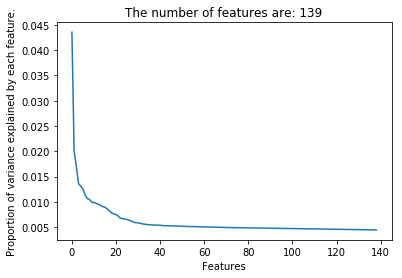

In [98]:
from sklearn.decomposition import PCA
pca = PCA(0.85, svd_solver = 'full')
X_train_pca = pca.fit_transform(scaled_X_train)
X_test_pca = pca.transform(scaled_X_test)
no_of_components = pca.n_components_
var_ratio = pca.explained_variance_ratio_
plt.plot(var_ratio)
plt.xlabel('Features')
plt.ylabel('Proportion of variance explained by each feature.')
plt.title('The number of features are: {}'.format(no_of_components))
plt.show()
#print("The number of features such that variance explained is more than 90% is : {}".format(pca.n_components_))
#print("The precentage of variance of each feature is: {}".format(pca.explained_variance_ratio_))

Let's start the prediction by using Logisitc Regression.

In [99]:
X_train_pca.shape

(38284, 139)

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf_log_reg = LogisticRegression(solver = 'lbfgs')
clf_log_reg.fit(X_train_pca, y_train)
pred = clf_log_reg.predict(X_test_pca)
score = accuracy_score(pred, y_test)
score

c:\users\win 8.1\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\win 8.1\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\users\win 8.1\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\users\win 8.1\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\users\win 8.1\appdata\loca

0.9494593323930418